# Logistic Regression

Logistic Regression is generally used for classification purposes. In Logistic Regression, the dependent variable is categorical. Classification determines the class label for an unlabeled test case.

The Iris dataset was used in R.A. Fisher's classic 1936 paper. The dataset is from Python Sklearn package.
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length and width, stored in a 150x4 numpy.ndarray.
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

## Import Packages

In [1]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [2]:
# Load iris dataset from python scikit-learn
iris_data = load_iris()

In [3]:
# Convert iris data to dataframe
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Size of  the dataset
data.shape

(150, 5)

In [5]:
# Check for missing values
data_missing = data.isnull().sum()
data_missing

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Data Exploration

In [6]:
# Analysis of Numerical data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Frquency of Categorical Values
data['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Data Visualization

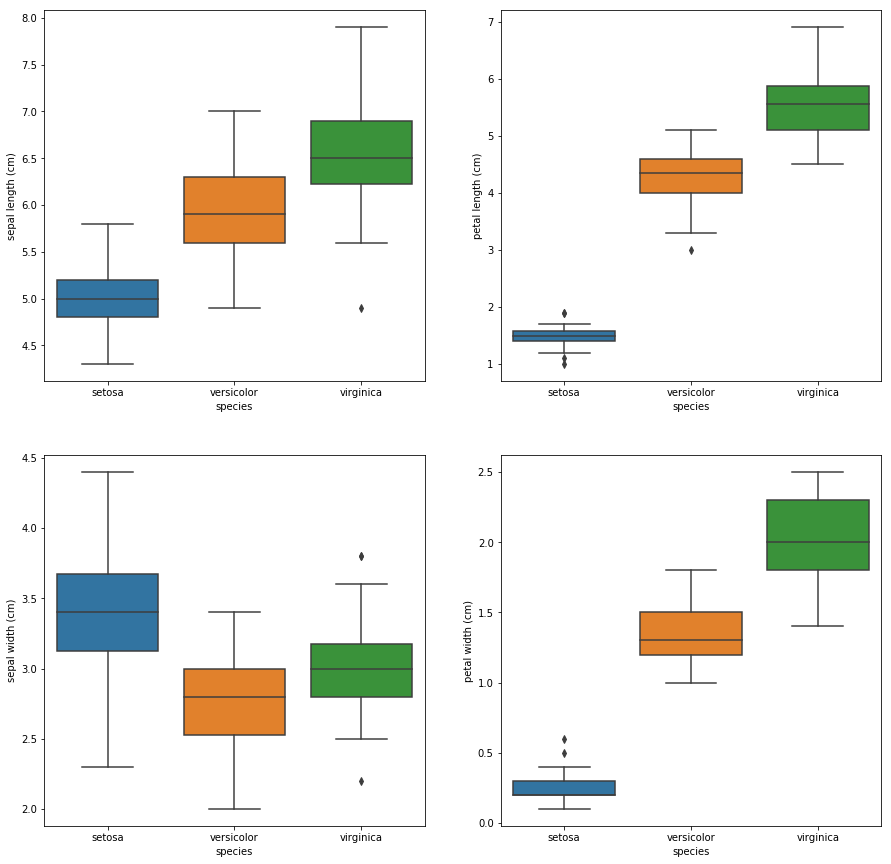

In [8]:
# Box and Whisker plots
fig, ((a,b), (c,d)) = plt.subplots(2, 2, figsize=(15,15))
sns.boxplot(x='species', y='sepal length (cm)', data=data, ax=a)
sns.boxplot(x='species', y='petal length (cm)', data=data, ax=b)
sns.boxplot(x='species', y='sepal width (cm)', data=data, ax=c)
sns.boxplot(x='species',y='petal width (cm)', data=data, ax=d)

#### __Insights:__
In the boxplots, outliers can be seen for different features ofspecies. Outliers are point distant from other observations. Outliers can distort predictions and affect accuracy of the model. There is an outlier for the Virginica species for Sepal Length at about 5.0 cm. Outliers can been seen for petal measurements of Setosa species.



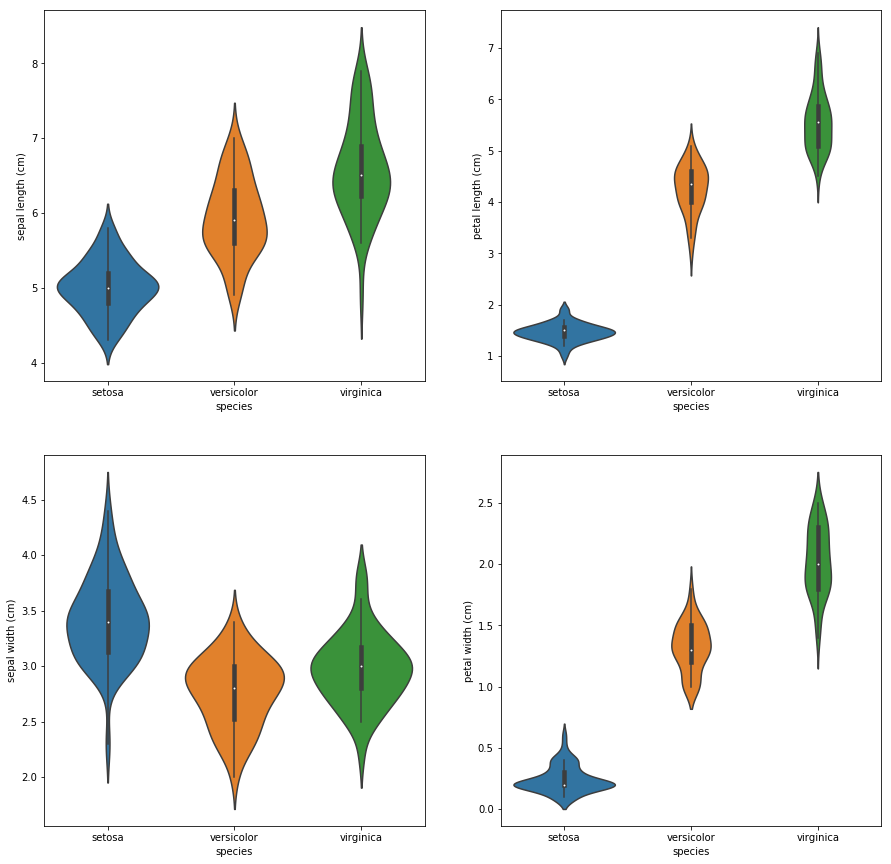

In [9]:
# Data visualization using Violin Plot
fig, ((a,b), (c,d)) = plt.subplots(2, 2, figsize=(15,15))
sns.violinplot(x='species', y='sepal length (cm)', data=data, ax=a)
sns.violinplot(x='species', y='petal length (cm)', data=data, ax=b)
sns.violinplot(x='species', y='sepal width (cm)', data=data, ax=c)
sns.violinplot(x='species', y='petal width (cm)', data=data, ax=d)

#### __Insight:__
In this violin plot , the denser regions of the data are fatter which is around the mean. And the sparser regions of the data are thinner.

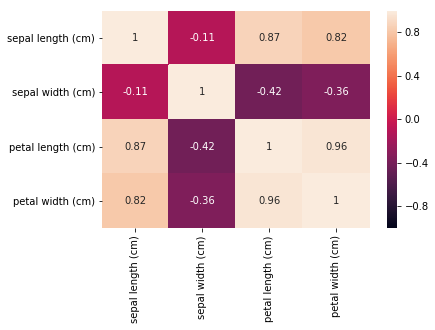

In [10]:
# Pairwise correlation between independent features
sns.heatmap(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr(), 
            vmin = -1, vmax=1, annot=True)
plt.show()

##### __Insight:__

It can be seen that there is a strong positive correlation between:
    1. Sepal Length and Petal Length - 0.87
    2. Sepal Length and Petal Width - 0.82
    3. Petal Length and Petal Width - 0.96
And there is no strong negative correlation.

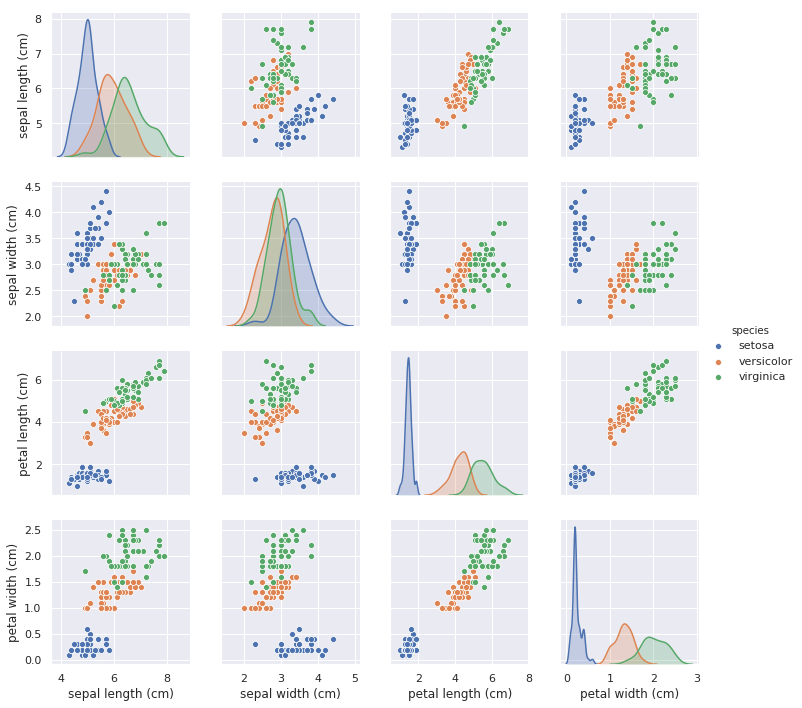

In [11]:
# Pairplot
sns.set()
sns.pairplot(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 
                   'petal width (cm)', 'species']],hue="species", diag_kind="kde")

##### __Insight:__
The blue, orange, and green dots represent the species setosa, versicolor, and virginica respectively. 
The diagonal shows th histogram of each feature. The scatterplots show that the measurements of sepal and petal of setosa species is very distinct and easily separable from the other two. The other two species appear to be different along some parameters. 

## Data Preparation

In [12]:
# Features for the model
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X =data[features]
print(X[0:5])

# Target for the model
y = preprocessing.LabelEncoder().fit(data['species']).transform(data['species']) # Categorial to numeric
y

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train/Test Data

In [13]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

## Logistic Regression with Scikit-learn

In [14]:
# Instantaite the model
model = LogisticRegression(random_state=1)

# Fit the model with train data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Predict the values with test data
y_predict = model.predict(X_test)
print(y_predict)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


## Performance Metrics

In [16]:
# Calculate the accuracy of the classification model
print(metrics.accuracy_score(y_test, y_predict) * 100)

93.33333333333333


The simplest performance metric is accuracy. Accuracy is fraction of correctly classified values. Here the accuracy of the model is 93.3%

In [17]:
# Confusion Matrix
cnfn_matrix = metrics.confusion_matrix(y_test, y_predict)
cnfn_matrix

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]])

Confusion Matrix is used to figure out the values that are classified correctly and incorrectly. Here the iris species Setosa is correctly classified. Whereas, for the Versicolor species, four values are correctly classified and one value is incorrectly classified and for the Virginica species, eight values are correctly classified and and one value is incorrectly classified.

In [18]:
# Precision, Recall, F1-Score
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.80      0.80      0.80         5
          2       0.89      0.89      0.89         9

avg / total       0.93      0.93      0.93        30



Precision is the fraction of correctly classified values out of all values classified.
Recall is the fraction of values correctly classified. It is the True Positive Rate.
The F1 score is weighted average of precision and recall.
Here iris species Setosa is correctly classified with a precision of 1. But the performance statistics of Versicolor and Virginica species is 0.80 and 0.89 respectively.

## Summary
In this program the following is done:

1. Prepared the iris data set for modeling with scikit-learn. The steps included separating the numeric features, and label encoding the categorical features. The result is a numpy array of features and a numpy array of the label values.
2. Computed a logistic regression model.
3. Evaluated the performance of the model using metrics like accuracy, confusion matrix and the precision, recall and F1. These statistics gave meaningful measures of model performance.